<a href="https://colab.research.google.com/github/ntxucb/W2-Introduccion-Data-Science/blob/main/W2_D4_Analisis_de_Datos_Python_NTXUCB_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 2 - Análisis de Datos con Python
## Sesión 4 - Proceso de Análisis en Ciencia de Datos

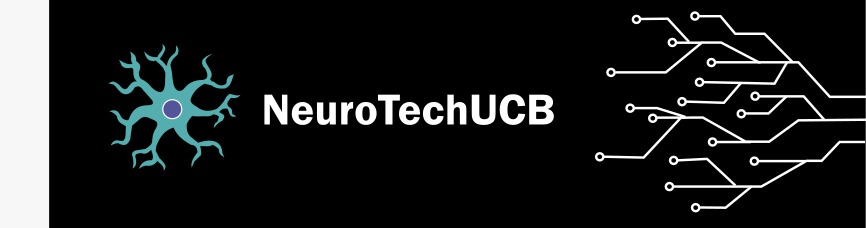

En esta sesión exploraremos lo siguiente:
- Las diferentes perspectivas del **proceso de análisis de datos en Data Science**
- Limpieza de Datos
- Exploratory Data Analysis
- Regresión Lineal con la libreria *scikit learn*

## Proceso en Data Science

- ¿Qué es Ciencia?
- ¿Es Data Science ciencia de verdad?
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Data_visualization_process_v1.png/525px-Data_visualization_process_v1.png" width="500">
<br>
<img src="https://miro.medium.com/max/1200/1*eE8DP4biqtaIK3aIy1S2zA.png" width="500">
<br>
<img src="https://www.springboard.com/blog/wp-content/uploads/2022/05/data-science-life-cycle.png" width="500">

## Limpieza de datos

In [ ]:
%matplotlib inline

In [ ]:
# Librerias mas usuales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Obtencion de los datos
df = pd.read_csv('https://raw.githubusercontent.com/ntxucb/W2-Introduccion-Data-Science/main/datasets/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Tamaño del dataset
df.shape

(1000, 8)

In [ ]:
# Saber cuantos valores nulos hay en el dataset
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# Informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Cambiar tipos de dato si es necesario
df = df.astype({'math score': 'float', 'reading score': 'float', 'writing score': 'float'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


## Exploratory Data Analysis (EDA)

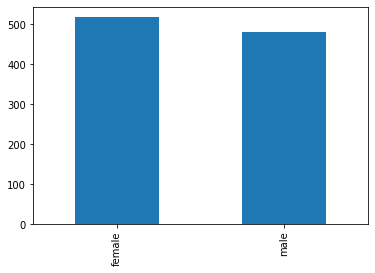

In [ ]:
# Graficas para ver si el dataset esta balanceado
df['gender'].value_counts().plot.bar()

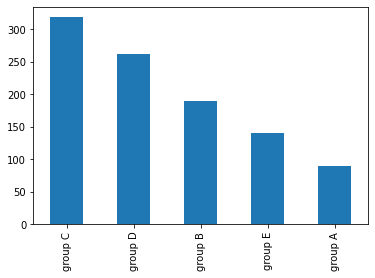

In [ ]:
df['race/ethnicity'].value_counts().plot.bar()

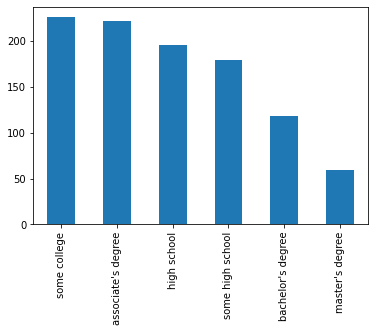

In [ ]:
df['parental level of education'].value_counts().plot.bar()

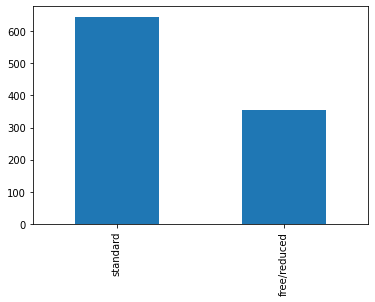

In [ ]:
df['lunch'].value_counts().plot.bar()

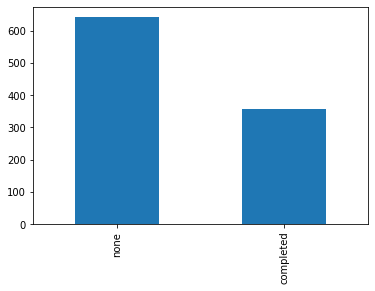

In [ ]:
df['test preparation course'].value_counts().plot.bar()

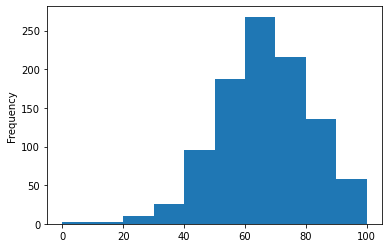

In [ ]:
# Plot de las notas de los estudiantes
df['math score'].plot.hist()

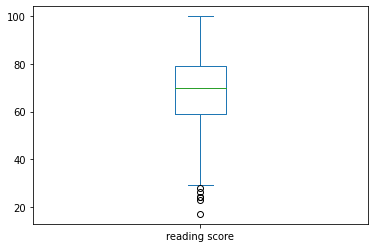

In [ ]:
df['reading score'].plot.box()

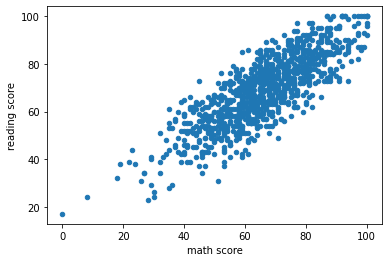

In [ ]:
# Plot de Notas de Matematica vs Notas de Lectura
df.plot.scatter(x='math score', y='reading score')

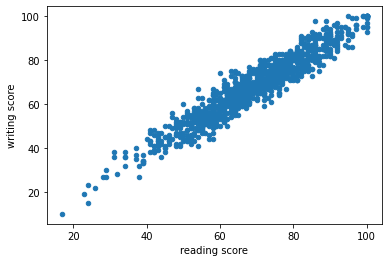

In [ ]:
df.plot.scatter(x='reading score', y='writing score')

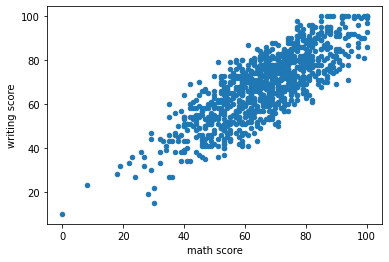

In [ ]:
df.plot.scatter(x='math score', y='writing score')

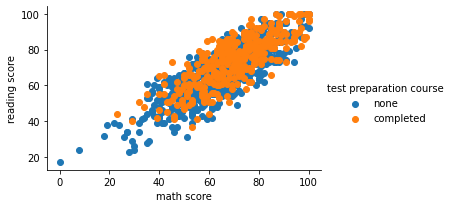

In [ ]:
# Diferenciar por estratos en el scatter plot, hay una respuesta con matplotlib pero es muy tediosa.
# Usaremos seaborn
import seaborn as sn

fg = sn.FacetGrid(data=df, hue='test preparation course', aspect=1.61)
fg.map(plt.scatter, 'math score', 'reading score').add_legend()

In [ ]:
# Group By
df.groupby(['test preparation course']).mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


### Tarea Clase [5 minutos]

Realizar un scatter plot de cualesquiera dos notas pero usando como color a otra variable categórica.

## Modelo - Regresión Lineal

In [ ]:
from sklearn import linear_model

In [ ]:
# Separar el Dataset en el dataset de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 0.25)
X_train = df_train['math score'].to_numpy().reshape(-1,1)
y_train = df_train['reading score'].to_numpy().reshape(-1,1)
X_test = df_test['math score'].to_numpy().reshape(-1,1)
y_test = df_test['reading score'].to_numpy().reshape(-1,1)

ValueError: ignored

In [ ]:
# Creamos el modelo
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

In [ ]:
# Predicciones
y_pred = regr.predict(X_test)
y_pred

In [ ]:
# Cuan bueno es el modelo
from sklearn.metrics import mean_squared_error, r2_score
print(regr)
print("Coeficientes: \n", regr.coef_)
print("Intercepto: \n", regr.intercept_)
# Mean Square Error
print("Error Cuadratico Medio:", mean_squared_error(y_test, y_pred))
# Coeficiente de Determinacion
print("Coeficiente de Determinacion:", r2_score(y_test, y_pred))

In [ ]:
# Plots
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.show()

### Tarea

- Explorar otros modelos a realizar 

- Revisar el video de EDA de una sesión con un Data Scientist de Platzi https://www.facebook.com/100027900619542/videos/611165919823423/